# Logistic Regression — Breast Cancer Dataset
This notebook demonstrates **Logistic Regression** using the real-world **Breast Cancer dataset** from `sklearn.datasets`.

Steps covered:
1. Setup & imports
2. Load dataset
3. Exploratory Data Analysis (EDA)
4. Train/test split
5. Fit Logistic Regression model
6. Evaluate performance
7. ROC curve & AUC
8. Feature importance (coefficients)


## 1. Setup & Imports

In [97]:
import sys, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Reproducibility
#np.random.seed(42) sets the starting point for NumPy’s random number generator, making results reproducible across runs.
#The number 42 is arbitrary but commonly used as a convention.
np.random.seed(42)


## 2. Load Breast Cancer Dataset

In [98]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset shape:", X.shape)
print("Classes:", cancer.target_names)


Dataset shape: (569, 30)
Classes: ['malignant' 'benign']


In [75]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Exploratory Data Analysis (EDA)
Check class distribution and correlations.

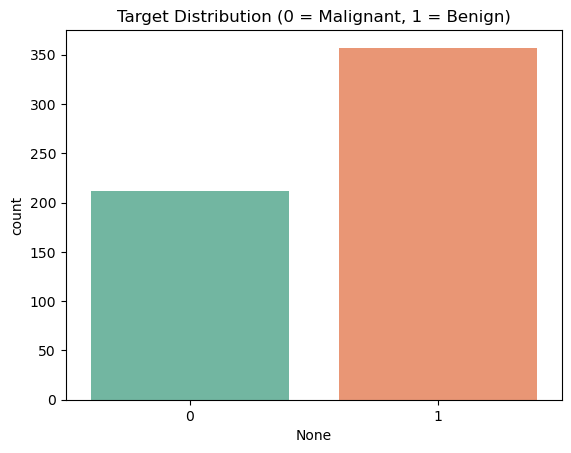

In [100]:
# Distribution of target
sns.countplot(x=y, hue=y, palette="Set2", legend=False)

plt.title("Target Distribution (0 = Malignant, 1 = Benign)")
plt.show()

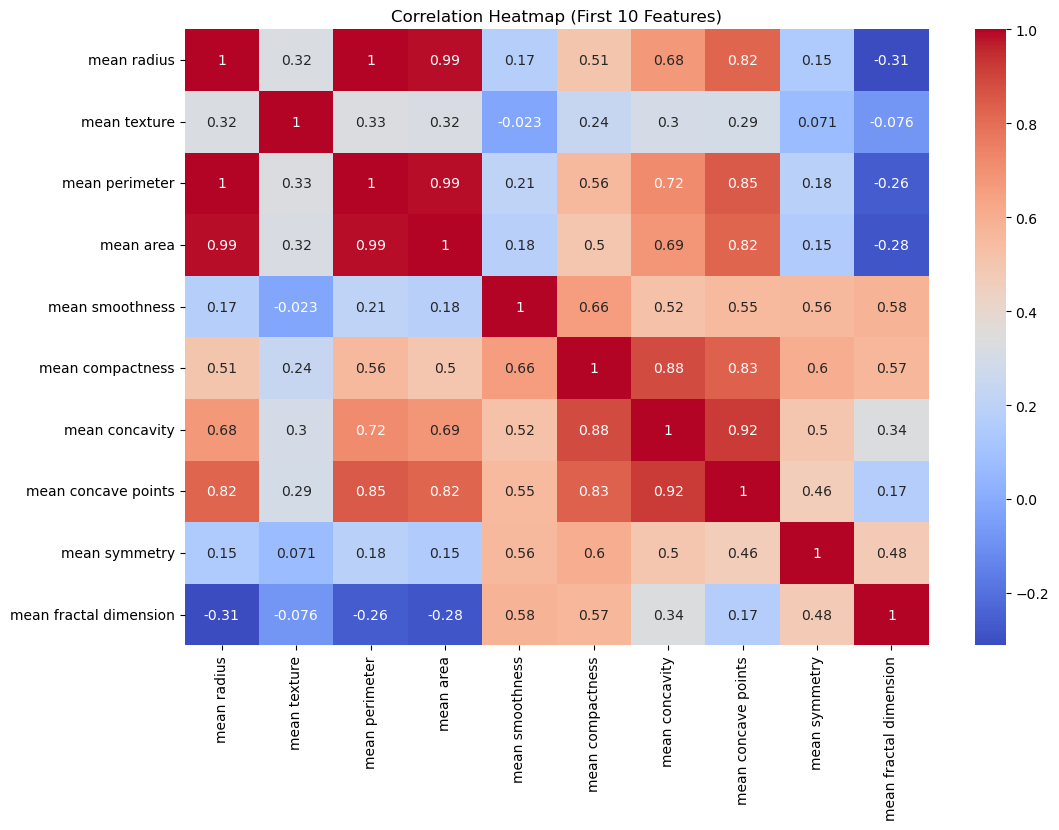

In [77]:
# Correlation heatmap of top features
plt.figure(figsize=(12,8))
sns.heatmap(X.corr().iloc[:10, :10], cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap (First 10 Features)")
plt.show()

## Pairplot of Two Features (Benign vs Malignant)

Shows class separation for two features.

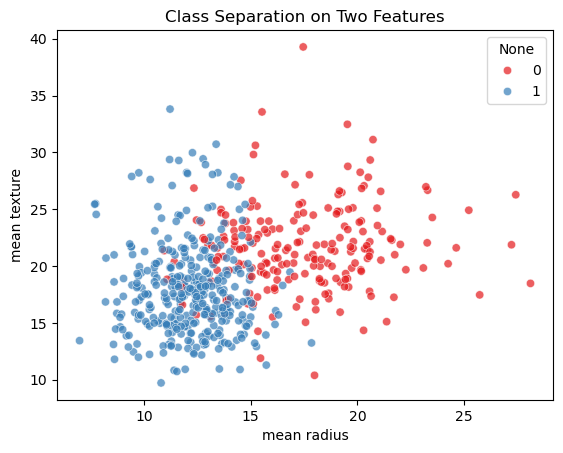

In [78]:
# Select 2 features for visualization
features_to_plot = ["mean radius", "mean texture"]
sns.scatterplot(x=X[features_to_plot[0]], y=X[features_to_plot[1]], hue=y, palette="Set1", alpha=0.7)
plt.title("Class Separation on Two Features")
plt.show()


## 4. Split Data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=None, random_state=42, shuffle = True)
X_train.shape, X_test.shape

((398, 30), (171, 30))

## 5. Fit Logistic Regression Model

In [109]:
model1 = LogisticRegression(max_iter=10000)
model1.fit(X_train, y_train)

#print("Intercept:", model.intercept_)
#print("Number of coefficients:", len(model.coef_[0]))

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)


/home/gato/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## 6. Model Evaluation

In [110]:
y_pred = model1.predict(X_test)

y2_pred = model2.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

acc2 = accuracy_score(y_test, y2_pred)
print("Accuracy:", acc2)

Accuracy: 0.9766081871345029
Accuracy: 0.9649122807017544



Confusion Matrix:
[[ 61   2]
 [  2 106]]


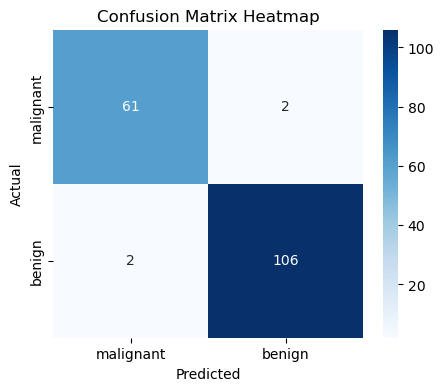

In [111]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [112]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## Confusion Matrix Heatmap

Easier to interpret than raw numbers.

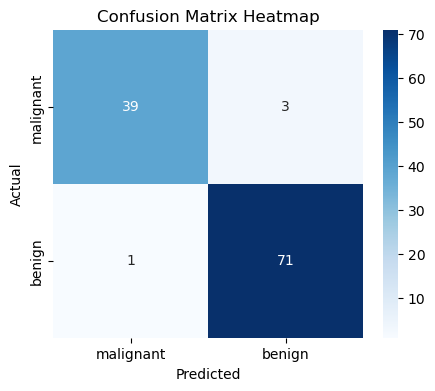

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


## Probability Distribution for Each Class

Shows how confident the model is.

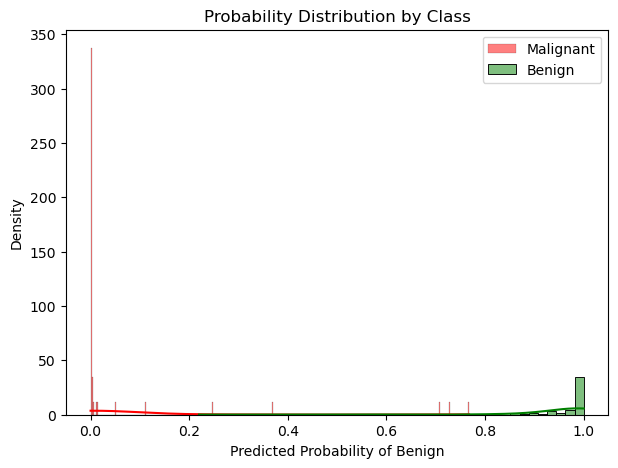

In [13]:
y_prob = model.predict_proba(X_test)[:,1]

plt.figure(figsize=(7,5))
sns.histplot(y_prob[y_test==0], color="red", label="Malignant", kde=True, stat="density")
sns.histplot(y_prob[y_test==1], color="green", label="Benign", kde=True, stat="density")
plt.xlabel("Predicted Probability of Benign")
plt.ylabel("Density")
plt.title("Probability Distribution by Class")
plt.legend()
plt.show()


## 7. ROC Curve & AUC

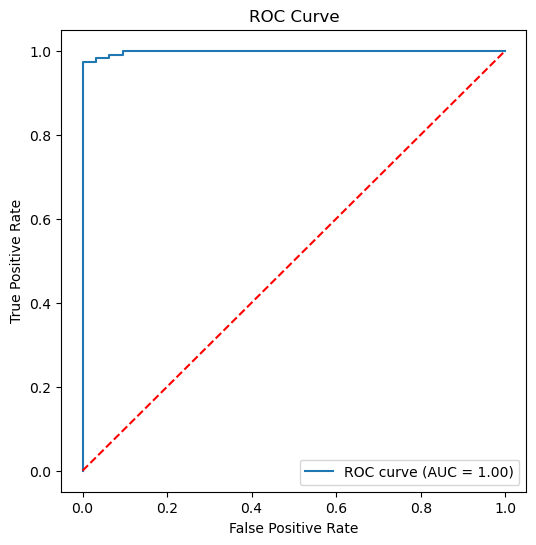

In [113]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 8. Feature Importance (Coefficients)
We can see which features contribute most to the prediction.

/tmp/ipykernel_11735/1802119691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_importance.values, y=coef_importance.index, palette='coolwarm')


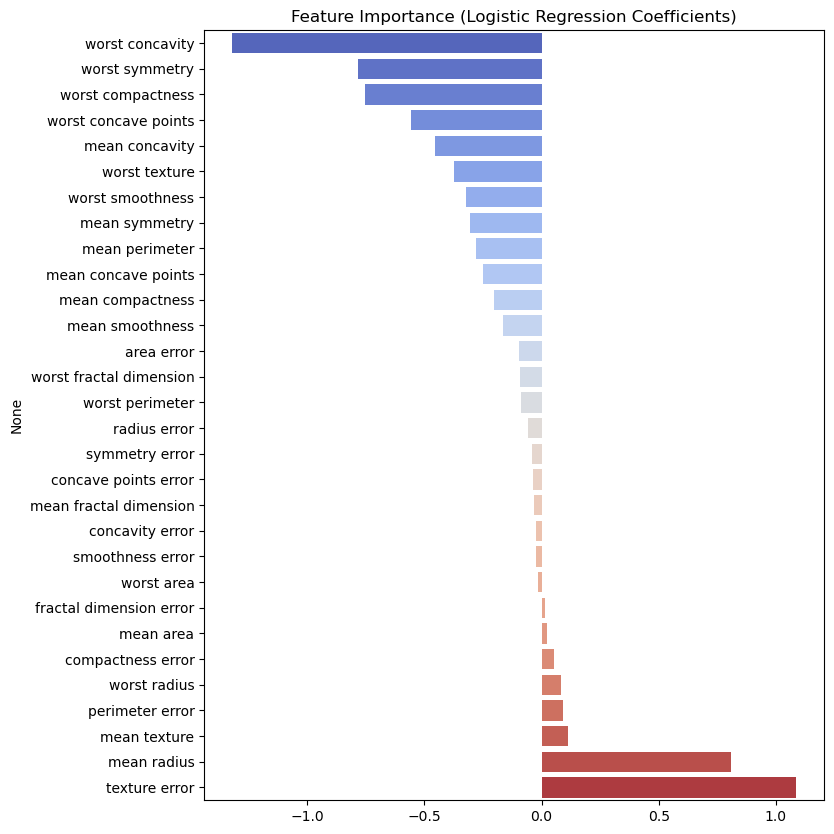

In [10]:
coef_importance = pd.Series(model.coef_[0], index=X.columns)
coef_importance = coef_importance.sort_values()

plt.figure(figsize=(8,10))
sns.barplot(x=coef_importance.values, y=coef_importance.index, palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

## Top Features Bar Plot (Positive vs Negative Influence)

Instead of showing all coefficients, highlight the top features.

/tmp/ipykernel_11735/2502663487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")


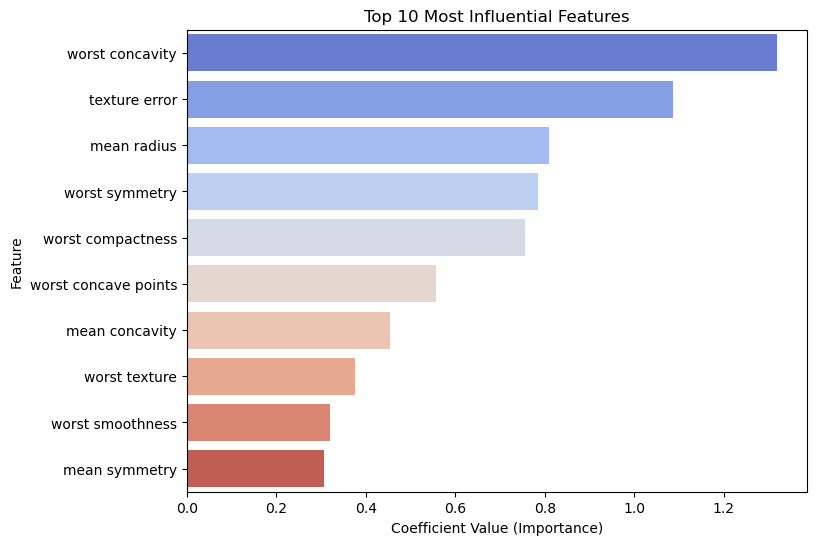

In [14]:
coef_importance = pd.Series(model.coef_[0], index=X.columns)
top_features = coef_importance.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")
plt.title("Top 10 Most Influential Features")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()


## PCA Projection (2D) with Logistic Regression Decision Boundary

Helps visualize how the model separates classes in lower dimensions.

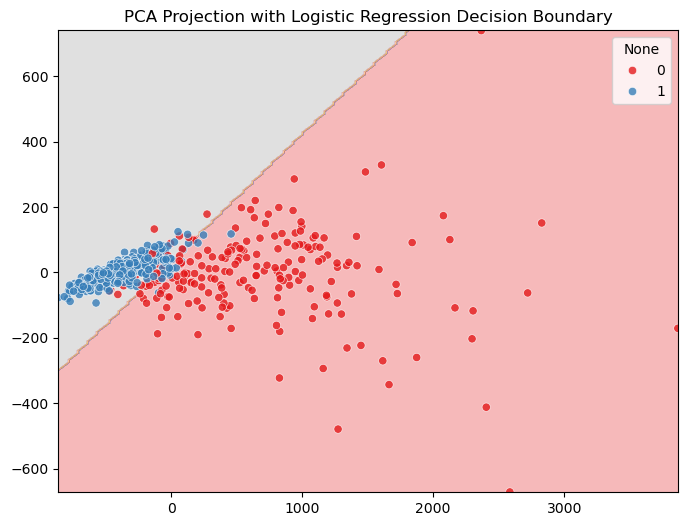

In [15]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit logistic regression on PCA data
model_pca = LogisticRegression(max_iter=10000)
model_pca.fit(X_pca, y)

# Meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 200),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 200))
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set1")
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", alpha=0.8)
plt.title("PCA Projection with Logistic Regression Decision Boundary")
plt.show()


### Actual vs Predicted (Line Plot)

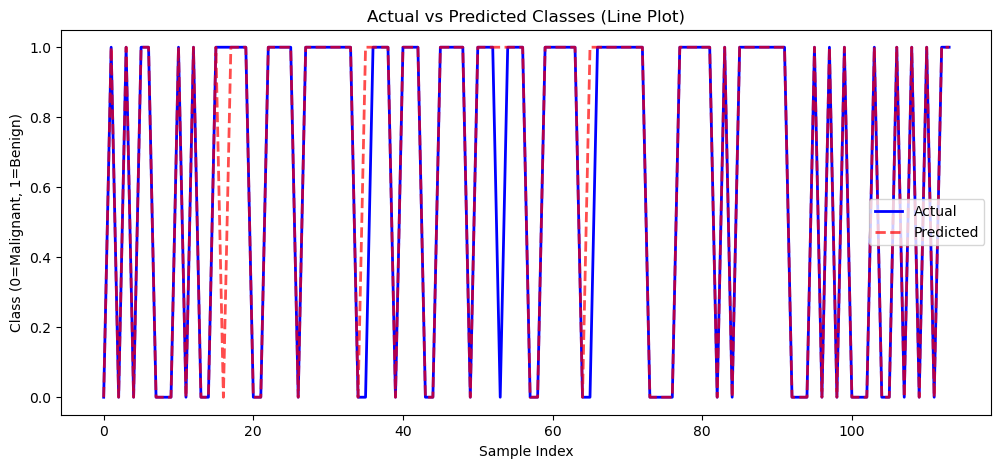

In [21]:
# Sort indices for a smoother line plot
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred}).reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(comparison.index, comparison["Actual"], label="Actual", color="blue", linewidth=2)
plt.plot(comparison.index, comparison["Predicted"], label="Predicted", color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.title("Actual vs Predicted Classes (Line Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=Malignant, 1=Benign)")
plt.legend()
plt.show()


## Side-by-Side Count Plot of Actual vs Predicted

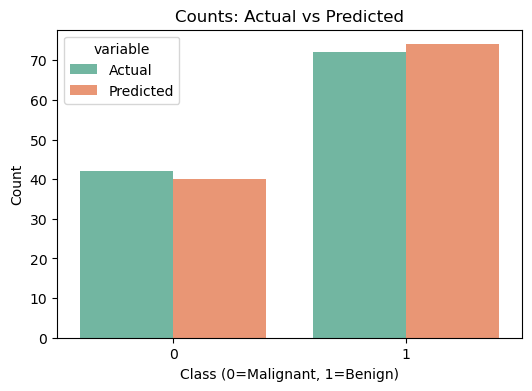

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="value", hue="variable", data=pd.melt(comparison), palette="Set2")
plt.title("Counts: Actual vs Predicted")
plt.xlabel("Class (0=Malignant, 1=Benign)")
plt.ylabel("Count")
plt.show()
